## Cosmic Structures HW2 Exercise 1: Numerical Random Fields

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

### Exercise 1a: Realisations of Gaussian Random Fields with Power Law Spectra $P(k) \propto k^{-\alpha}$ 
with different $\alpha$ and resolutions.

C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\489165762.py:14: RuntimeWarning: divide by zero encountered in power
  P_k = lambda k: np.where(k>0,k**(alpha),0.0)
C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\489165762.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  P_k = lambda k: np.where(k>0,k**(alpha),0.0)


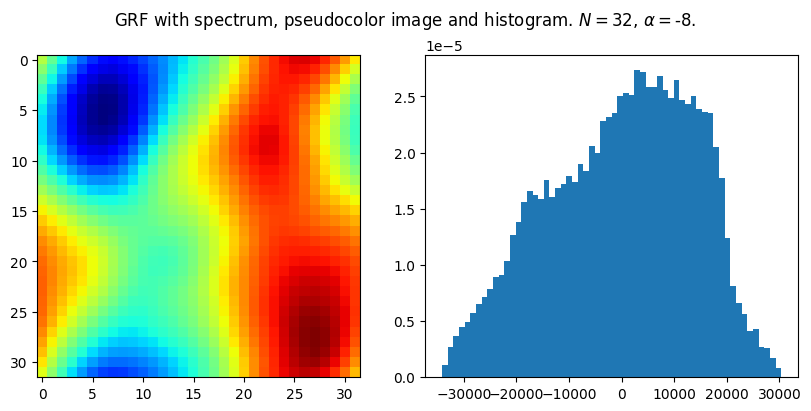

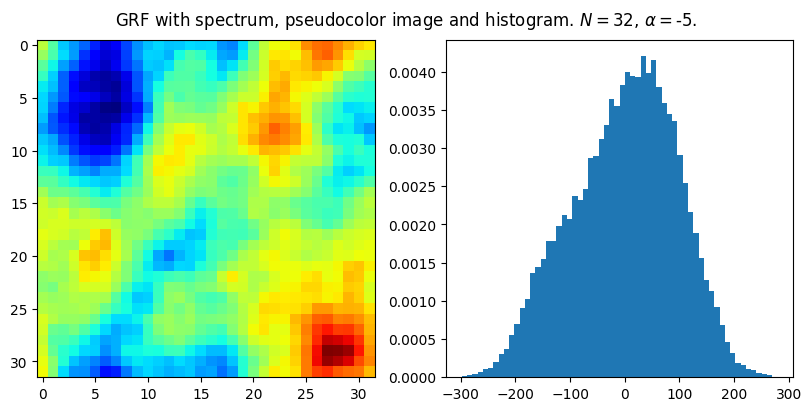

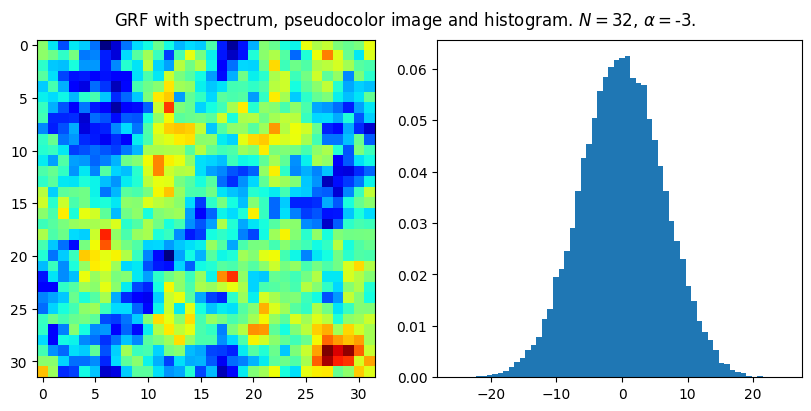

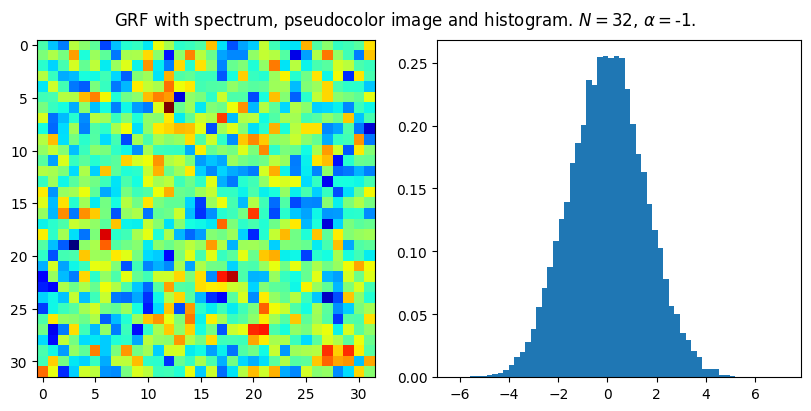

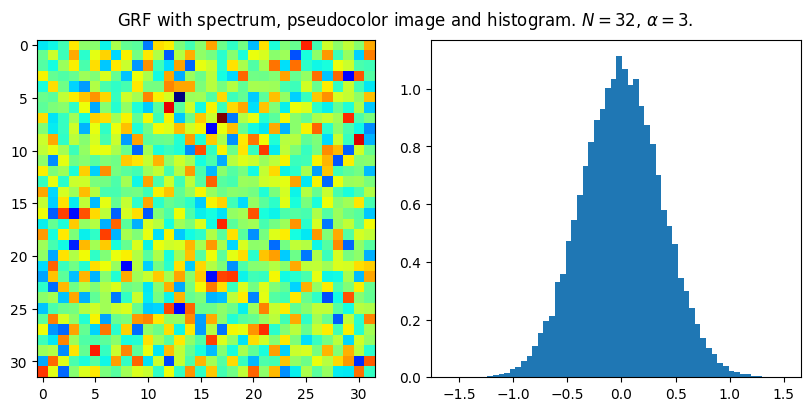

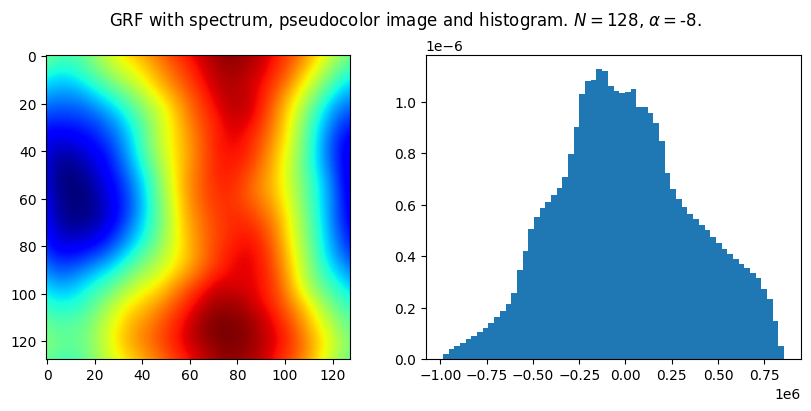

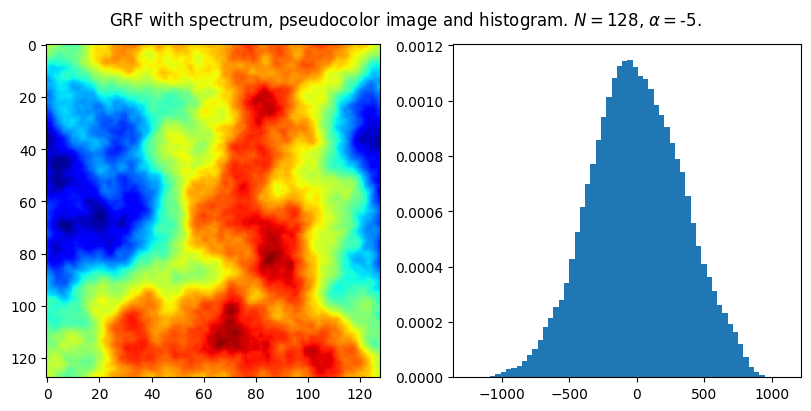

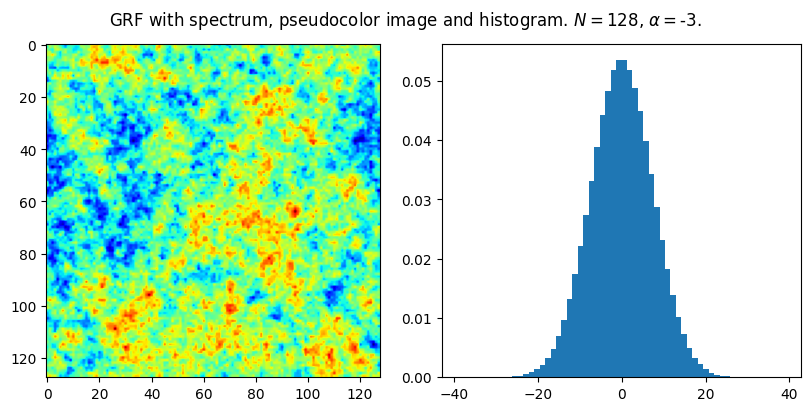

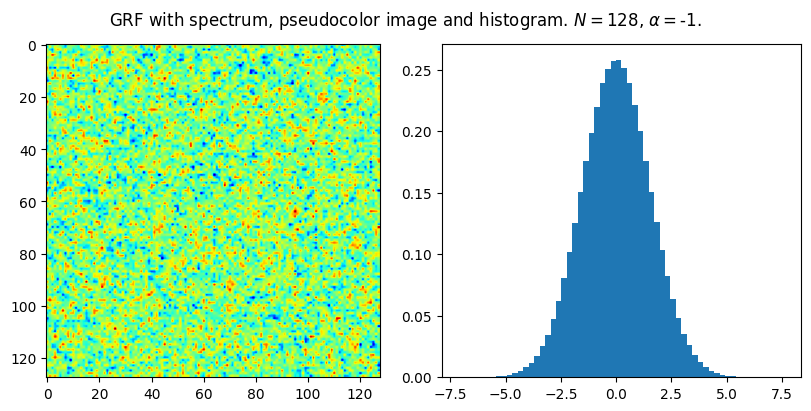

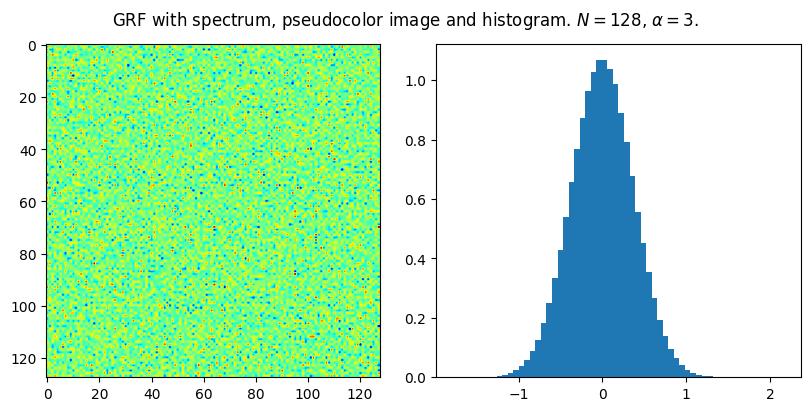

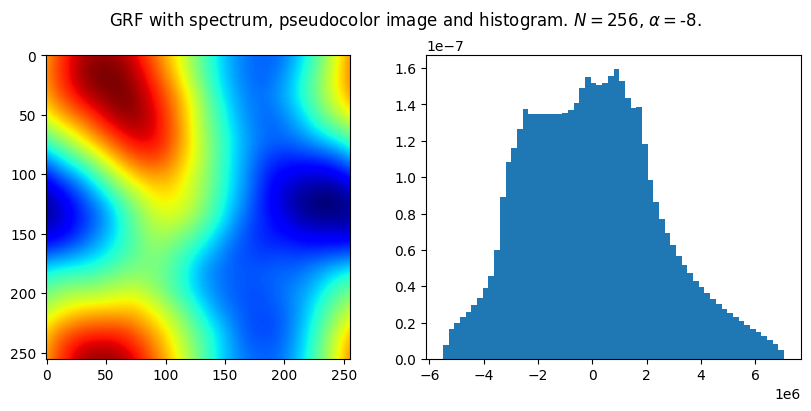

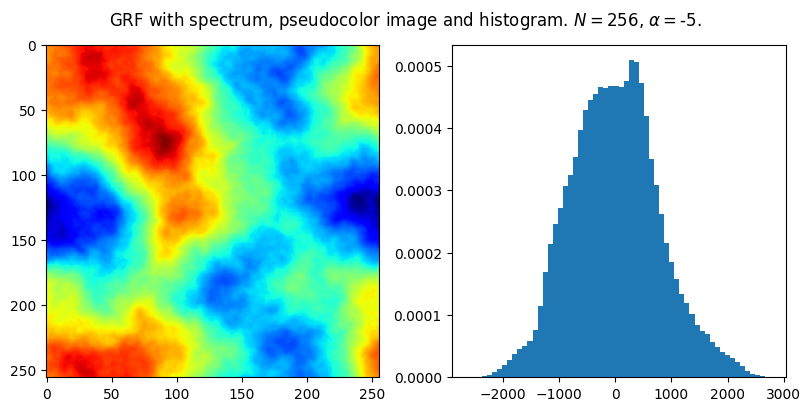

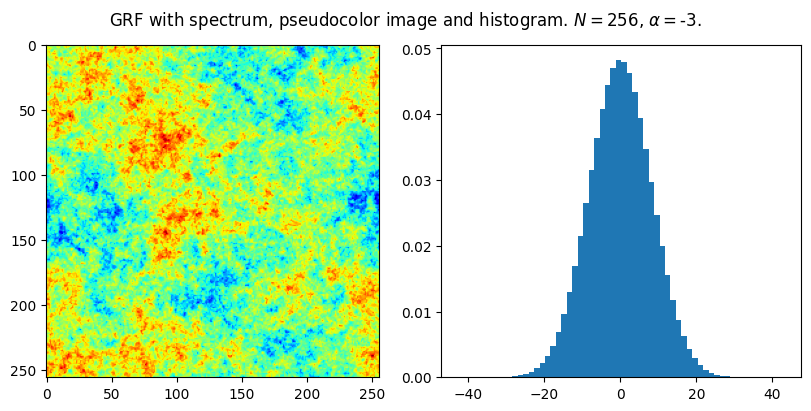

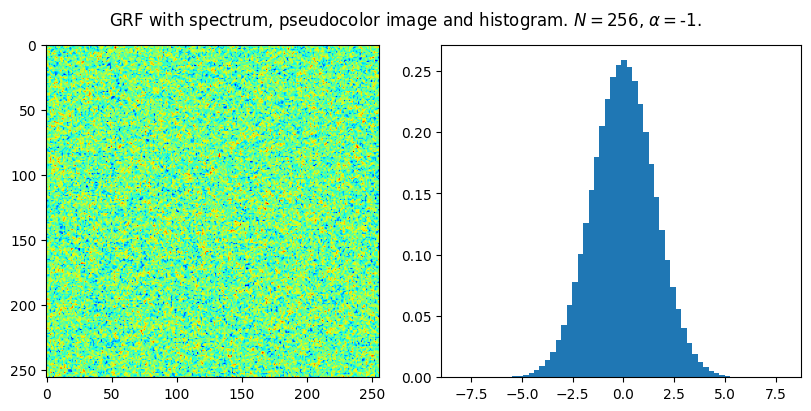

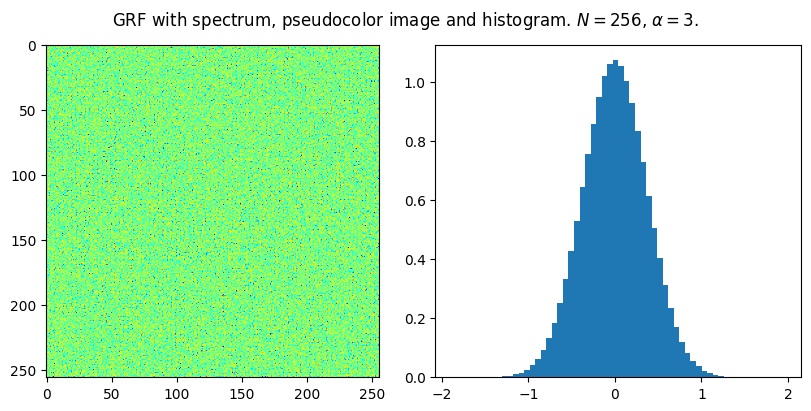

In [3]:
for N in [32, 128, 256]:
    f0 = np.random.normal(size=[N,N,N])

    # Fourier transform the uncorrelated real field -> yields uncorrelated complex field with Hermitian symmetry
    ff0 = np.fft.fftn(f0)

    # set up the modes associated with the array entries returned by fftn
    k_1d = np.fft.fftfreq(N)
    # create the 3D grid of wave numbers
    kx, ky, kz  = np.meshgrid(k_1d,k_1d,k_1d, indexing='ij')

    for alpha in [-8, -5, -3, -1, 3]:
    
        P_k = lambda k: np.where(k>0,k**(alpha),0.0)

        # compute vector norm for each entry (i,j,k)
        k = np.sqrt(kx**2 + ky**2 + kz**2)

        # Karhunen-Loève: multiply uncorrelated Gaussian field with sqrt of power spectrum and apply invere Fourier transform
        ff1 =  np.sqrt( P_k(k) ) * ff0
        f1  = np.fft.ifftn(ff1).real

        fig, ax = plt.subplots(1,2,figsize=[8,4],layout='constrained')
        fig.suptitle(f'GRF with spectrum, pseudocolor image and histogram. $N=${N}, $\\alpha=${alpha}.')
        ax[0].imshow(f1[...,N//2], cmap='jet')
        ax[1].hist(f1.flatten(),bins=60,density=True);

We find that a larger $\alpha$ leads to stronger correlations. We find that the correlations are invariant of scaling, so they look the same on every scale/resolution. 

### Exercise 1b: Realisation of gradient and Hessian fields with Fourier space technique

C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\531912097.py:15: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod ** -(alpha/2) # multiply with amplitude


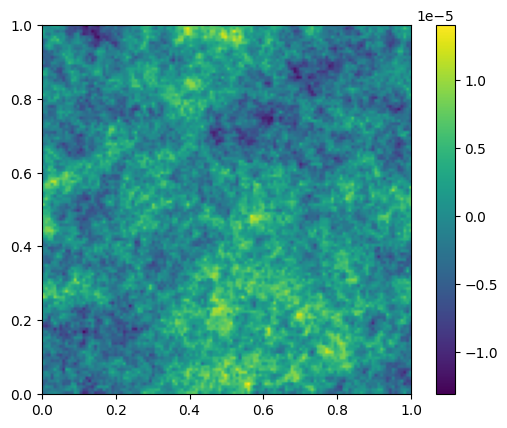

In [4]:
nvals = np.random.normal(size=1000)
N = 128
f = np.random.normal(size=(N,N,N))

L = 1.0 # the 'physical' box size, sets units of the fundamental mode
kmin = 2.0*np.pi/L # the fundamental mode of the box
kmax = kmin * N/2 # the Nyquist mode of each linear dimension
k1d = np.fft.fftfreq(N,d=1.0/kmin/N) # get FFT mode vector
kv = np.meshgrid(k1d,k1d,k1d) # get k vector, k = (kx,ky,kz)

alpha = 3.0
norm = 1.0/(2*np.pi)**(-1.5)
kmod = np.sqrt(kv[0]**2 + kv[1]**2 + kv[2]**2) # modulus of k = (kx,ky,kz)
fk = np.random.normal(size=(N,N,N)) + 1j * np.random.normal(size=(N,N,N))
fk = fk * kmod ** -(alpha/2) # multiply with amplitude
fk[0,0,0] = 0.0 # zero f(k=0), to enforce zero mean
f = np.fft.ifftn(fk) # inverse transform
f = norm * np.real( f ) # take real part and normalise

plt.imshow(f[:,:,32],extent=[0,L,0,L])
plt.colorbar()

In [5]:
# Gradient Field

# create an empty N*N*N*3 field (4D!) to hold the gradient field
fD1 = np.zeros([N,N,N,3],dtype=complex)
# loop over dimensions
for i in range(3):
    # store component i in gradient field
    fD1[...,i] = fk * 1j * kv[i] / kmod
    fD1[0,0,0,i] = 0.0
# inverse transform along axes 0,1,2 (but not 3) of the 4d array
D1 = np.real(np.fft.ifftn(fD1,axes=[0,1,2]))

C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\389795036.py:8: RuntimeWarning: invalid value encountered in divide
  fD1[...,i] = fk * 1j * kv[i] / kmod


In [6]:
# Hessian Field

# create an empty N*N*N*3*3 field (5D!) to hold the hessian field
fD2 = np.zeros([N,N,N,3,3],dtype=complex)
# loop over dimensions
for i in range(3):
    for l in range(3):
        # store component i in gradient field
        fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)
        fD2[0,0,0,i,l] = 0.0
# inverse transform along axes 0,1,2 (but not 3 and 4) of the 5d array
D2 = np.real(np.fft.ifftn(fD2,axes=[0,1,2]))

# Example: hessian at position (0,0,0)
print("Hessian at example point x=(0,0,0): \n", D2[0,0,0,:,:])

C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\3339253568.py:9: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


Hessian at example point x=(0,0,0): 
 [[-1.33980622e-07  3.65101607e-08 -5.59751410e-08]
 [ 3.65101607e-08 -1.46631341e-07  1.03707553e-07]
 [-5.59751410e-08  1.03707553e-07  4.16825646e-08]]


### Exercise 1c: Eigenvalues of the Hessian

Fraction of field with 0 positive eigenvalues: 0.0823054313659668
Fraction of field with 1 positive eigenvalues: 0.4227447509765625
Fraction of field with 2 positive eigenvalues: 0.4167008399963379
Fraction of field with 3 positive eigenvalues: 0.07824897766113281


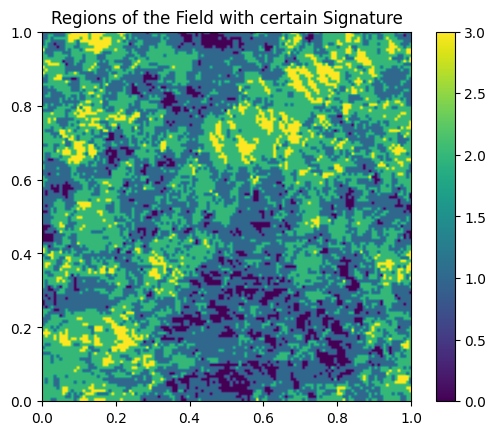

In [7]:

# Store eigenvalues of Hessian of each point x
hess_eigvals = np.zeros([N,N,N,3])
hess_eigvals[...,:] = np.linalg.eigvalsh(D2[...,:,:])

# Count number of positive eigenvalues of Hessian of each point x
hess_sig = np.zeros([N,N,N])
hess_sig[...] = np.sum(hess_eigvals > 0, axis=-1)

# Plot the signature of the Hessian field
plt.imshow(hess_sig[:,:,32],extent=[0,L,0,L])
plt.title('Regions of the Field with certain Signature')
plt.colorbar()

# Determine the fractions of the field with respective signatures
sig_frac = np.zeros([4])
for i in range(4):
    sig_frac[i] = np.sum(hess_sig == i) / N**3
    print(f'Fraction of field with {i} positive eigenvalues: {sig_frac[i]}')


Now we want to do the same but with different $\alpha$ to see if the signature of the hessian field depends on $\alpha$.

In [8]:
for alpha in [-8, -4, -3, 1, 2, 3]:

    # Generate f with power spectrum k^(-alpha)
    fk = np.random.normal(size=(N,N,N)) + 1j * np.random.normal(size=(N,N,N))
    fk = fk * kmod ** -(alpha/2) # multiply with amplitude
    fk[0,0,0] = 0.0 # zero f(k=0), to enforce zero mean
    f = np.fft.ifftn(fk) # inverse transform
    f = norm * np.real( f ) # take real part and normalise

    # create an empty N*N*N*3*3 field (5D!) to hold the hessian field
    fD2 = np.zeros([N,N,N,3,3],dtype=complex)
    # loop over dimensions
    for i in range(3):
        for l in range(3):
            # store component i in gradient field
            fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)
            fD2[0,0,0,i,l] = 0.0
    # inverse transform along axes 0,1,2 (but not 3 and 4) of the 5d array
    D2 = np.real(np.fft.ifftn(fD2,axes=[0,1,2]))

    # Store eigenvalues of Hessian of each point x
    hess_eigvals = np.zeros([N,N,N,3])
    hess_eigvals[...,:] = np.sort(np.linalg.eigvalsh(D2[...,:,:]))

    # Count number of positive eigenvalues of Hessian of each point x
    hess_sig = np.zeros([N,N,N])
    hess_sig[...] = np.sum(hess_eigvals > 0, axis=-1)

    # Determine the fractions of the field with respective signatures
    sig_frac = np.zeros([4])
    for i in range(4):
        sig_frac[i] = np.sum(hess_sig == i) / N**3
   
    print(f'For alpha = {alpha} the fractions of the field with respective signatures are:', sig_frac)

C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\1902933200.py:16: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


For alpha = -8 the fractions of the field with respective signatures are: [0.08567572 0.41422415 0.41465187 0.08544827]
For alpha = -4 the fractions of the field with respective signatures are: [0.08273172 0.41729736 0.41730595 0.08266497]
For alpha = -3 the fractions of the field with respective signatures are: [0.08192492 0.41854382 0.41743469 0.08209658]


C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\1902933200.py:5: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod ** -(alpha/2) # multiply with amplitude


For alpha = 1 the fractions of the field with respective signatures are: [0.08000183 0.42023325 0.41993952 0.0798254 ]


C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\1902933200.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  fk = fk * kmod ** -(alpha/2) # multiply with amplitude


For alpha = 2 the fractions of the field with respective signatures are: [0.0798769  0.41968822 0.42042589 0.08000898]
For alpha = 3 the fractions of the field with respective signatures are: [0.07824183 0.416749   0.42341089 0.08159828]


For every $\alpha$, the signature fractions are close to our estimated fractions $P[+++]=P[---]=8\%$ and $P[+--]=P[++-]=42\%$ of a Gaussian random field.
The signature corresponds to the extrema of the field. All eigenvalues of the Hessian positive means a local minimum, two eigenvalues positive mean a saddle point, one eigenvalue positive a ridge and all eigenvalues negative correspond to a minimum. The fraction of the field with each signature is completely independent of the power law exponent.

### Exercise 1d: Distribution of ordered Eigenvalues of Hessian Field

In [9]:
def p_lambda1(lambda1, sigma2):
    part1 = np.sqrt(5/(72*np.pi))*(20*lambda1**2-sigma2**2)/sigma2**3*(erf(lambda1*np.sqrt(2)/sigma2)+1)*np.exp(-5*lambda1**2/(2*sigma2**2))
    part2 = np.sqrt(15/(16*np.pi*sigma2**2))*(erf(lambda1*np.sqrt(3)/(2*sigma2))+1)*np.exp(-15*lambda1**2/(4*sigma2**2))
    part3 = 5*np.sqrt(5)/(3*np.pi*sigma2**2)*lambda1*np.exp(-9*lambda1**2/(2*sigma2**2))
    return part1 + part2 + part3

def p_lambda2(lambda2, sigma2):
    return np.sqrt(15/(4*np.pi*sigma2**2))*np.exp(-15*lambda2**2/(4*sigma2**2))

def p_lambda3(lambda3, sigma2):
    return p_lambda1(-lambda3, sigma2)


C:\Users\AltonV\AppData\Local\Temp\ipykernel_22136\1199223213.py:16: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


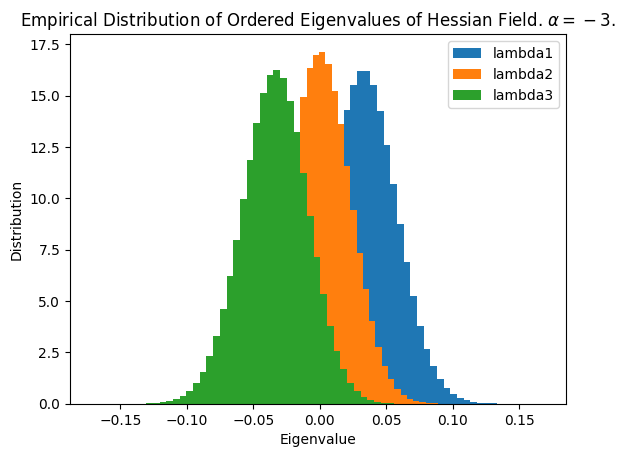

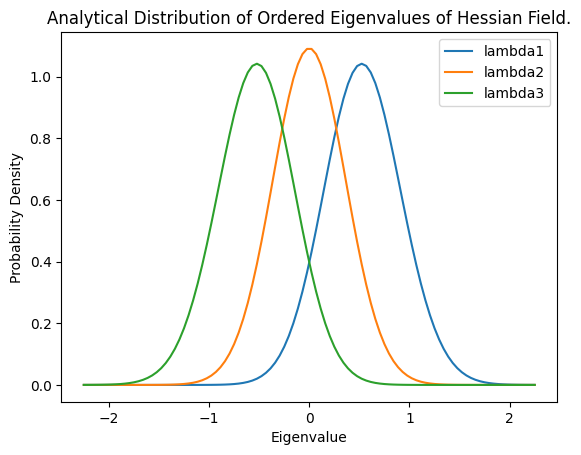

In [34]:
for alpha in [-3]:    
    # Generate f with power spectrum k^(-alpha)
    fk = np.random.normal(size=(N,N,N)) + 1j * np.random.normal(size=(N,N,N))
    fk = fk * kmod ** -(alpha/2) # multiply with amplitude
    fk[0,0,0] = 0.0 # zero f(k=0), to enforce zero mean
    f = np.fft.ifftn(fk) # inverse transform
    f = norm * np.real( f ) # take real part and normalise
    sigma2 = np.sqrt(f.var())

    # create an empty N*N*N*3*3 field (5D!) to hold the hessian field
    fD2 = np.zeros([N,N,N,3,3],dtype=complex)
    # loop over dimensions
    for i in range(3):
        for l in range(3):
            # store component i in gradient field
            fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)
            fD2[0,0,0,i,l] = 0.0
    # inverse transform along axes 0,1,2 (but not 3 and 4) of the 5d array
    D2 = np.real(np.fft.ifftn(fD2,axes=[0,1,2]))

    # Store eigenvalues of Hessian of each point x
    hess_eigvals = np.zeros([N,N,N,3])
    hess_eigvals[...,:] = np.sort(np.linalg.eigvalsh(D2[...,:,:]))

    # Get every eigenvalue distribution in flat array
    lambda1 = hess_eigvals[:,:,:,2].flatten()
    lambda2 = hess_eigvals[:,:,:,1].flatten()
    lambda3 = hess_eigvals[:,:,:,0].flatten()

    plt.hist(lambda1/sigma2, bins=50, density=True, label='lambda1')
    plt.hist(lambda2/sigma2, bins=50, density=True, label='lambda2')
    plt.hist(lambda3/sigma2, bins=50, density=True, label='lambda3')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Distribution')
    plt.title(f'Empirical Distribution of Ordered Eigenvalues of Hessian Field. $\\alpha={alpha}$.')
    plt.legend()
    plt.show()

    x = np.linspace(-2.25, 2.25, 100)
    sigma2 = 1

    plt.plot(x, p_lambda1(x, sigma2), label='lambda1')
    plt.plot(x, p_lambda2(x, sigma2), label='lambda2')
    plt.plot(x, p_lambda3(x, sigma2), label='lambda3')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Probability Density')
    plt.title(f'Analytical Distribution of Ordered Eigenvalues of Hessian Field.')
    plt.legend()
    plt.show()

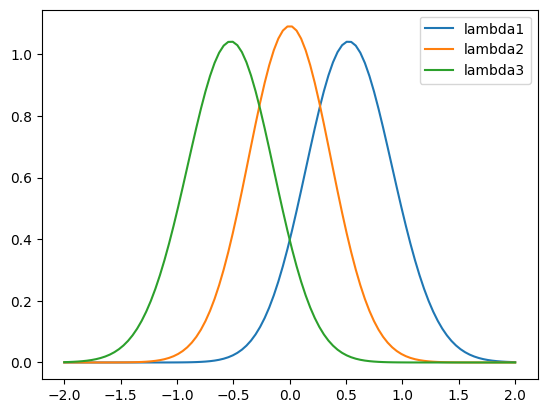

In [24]:


x = np.linspace(-2, 2, 100)
plt.plot(x, p_lambda1(x, sigma2), label='lambda1')
plt.plot(x, p_lambda2(x, sigma2), label='lambda2')
plt.plot(x, p_lambda3(x, sigma2), label='lambda3')

# Add a legend
plt.legend()

# Show the plot
plt.show()

The distribution of the ordered eigenvalues matches the analytical distribution from the lecture notes pretty closely. 